# pandas and numpy
data cleaning, aggregation, joins, visualization

In [39]:
import pandas as pd
import numpy as np

In [40]:
data = pd.read_csv('01_pandas/bigmart_data.csv')

In [41]:
data_f = pd.DataFrame(data)
data_f

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [42]:
data_f.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
data_f.shape

(8523, 12)

In [44]:
data_f.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
data_f.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
data_f.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [47]:
data_f.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [48]:
items = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type']
outlets = ['Item_Identifier','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']

# data cleaning

In [49]:
data_f['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [50]:
data_f['Item_Fat_Content'] = data_f['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [51]:
data_f['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [52]:
data_f['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [53]:
data_f['Outlet_Size'].isnull().sum()

np.int64(2410)

Outlet_Size - has many missing columns, it is categorical and we cannot fill it with numbers easilu

In [54]:
data_f.groupby('Outlet_Type')['Outlet_Size'].value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             555
                   Small           528
Supermarket Type1  Small          1860
                   NaN            1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

In [55]:
data_f['Outlet_Size'] = data_f.groupby('Outlet_Type')['Outlet_Size'] \
                              .transform(lambda x: x.fillna(x.mode()[0]))

In [56]:
median = data_f['Item_Weight'].median()

In [57]:
data_f['Item_Weight'] = data_f['Item_Weight'].fillna(median)

In [58]:
data_f['Item_Weight'].isnull().sum()

np.int64(0)

In [59]:
m2 = data_f['Item_Visibility'].median()
data_f['Item_Visibility'] = data_f['Item_Visibility'].fillna(m2)

In [60]:
data_f.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [61]:
data_f.duplicated().sum()

np.int64(0)

In [62]:
data_f.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


# visualisation

Axes(0.125,0.11;0.775x0.77)


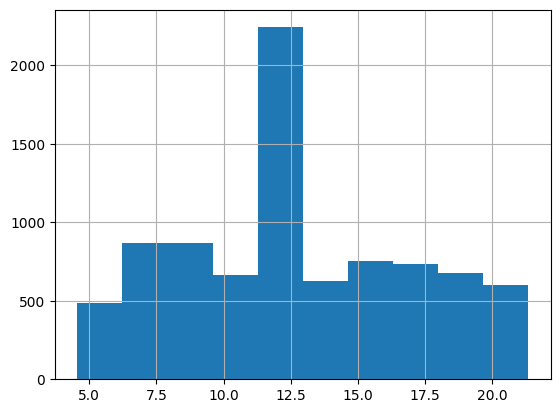

In [63]:
import matplotlib.pyplot as plt
print(data_f['Item_Weight'].hist())

Axes(0.125,0.11;0.775x0.77)


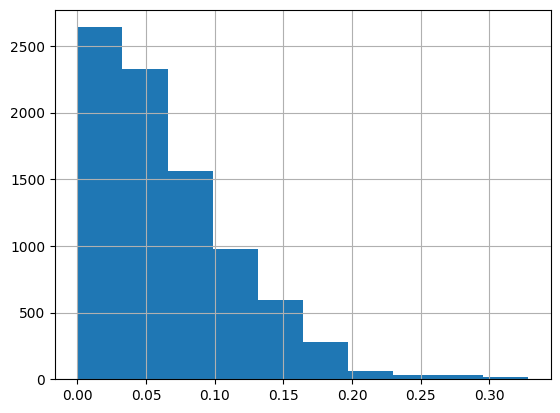

In [64]:
print(data_f['Item_Visibility'].hist())

Axes(0.125,0.11;0.775x0.77)


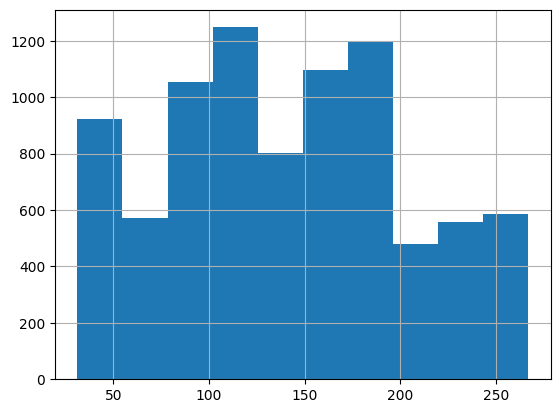

In [65]:
print(data_f['Item_MRP'].hist())

Which Item_Type has the highest average visibility?

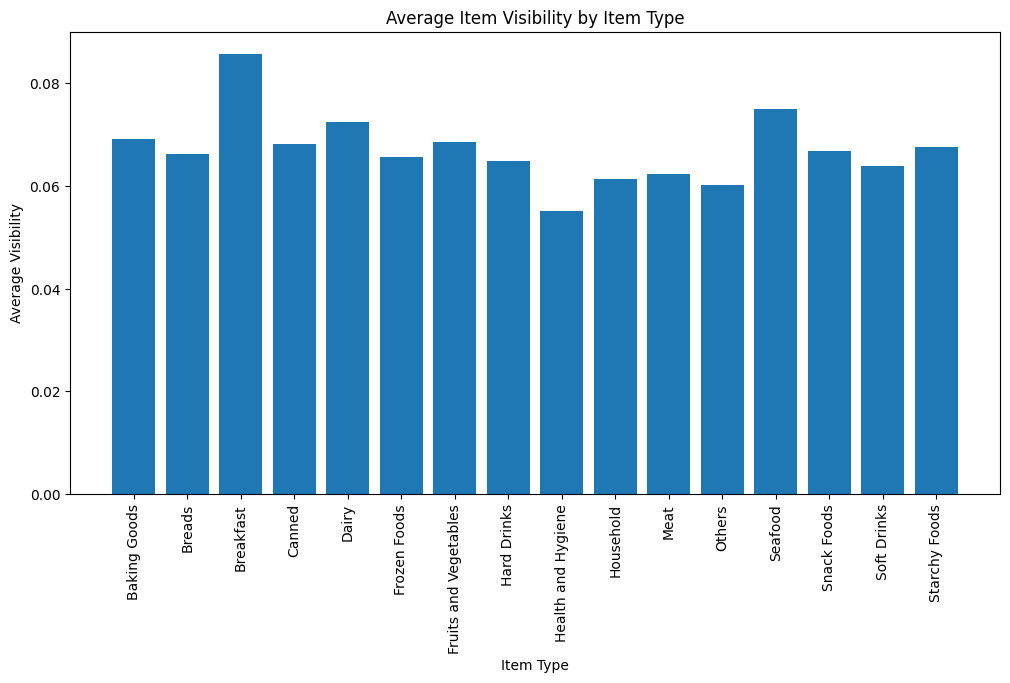

In [66]:
bar_chart = data_f.groupby('Item_Type')['Item_Visibility'].mean()

plt.figure(figsize=(12,6))
plt.bar(bar_chart.index, bar_chart.values)
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Average Visibility")
plt.title("Average Item Visibility by Item Type")
plt.show()


Which Outlet_Type sells the most?

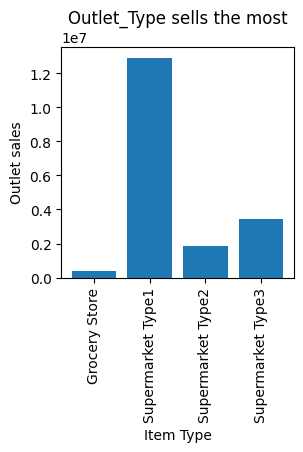

In [67]:
sell_most = data_f.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(3,3))
plt.bar(sell_most.index, sell_most.values)
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Outlet sales")
plt.title("Outlet_Type sells the most")
plt.show()


In [68]:
data_f.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


sales_by_outlet_loc_type 

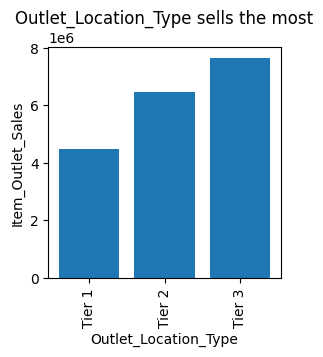

In [69]:
sell_most_second = data_f.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(3,3))
plt.bar(sell_most_second.index, sell_most_second.values)
plt.xticks(rotation=90)
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Location_Type sells the most")
plt.show() 


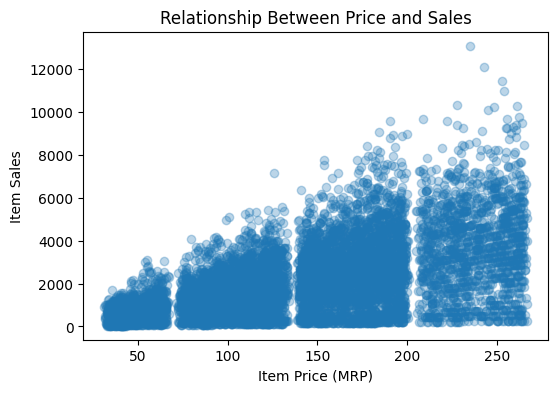

In [70]:
plt.figure(figsize=(6,4))
plt.scatter(data_f['Item_MRP'], data_f['Item_Outlet_Sales'], alpha=0.3)
plt.xlabel("Item Price (MRP)")
plt.ylabel("Item Sales")
plt.title("Relationship Between Price and Sales")
plt.show()


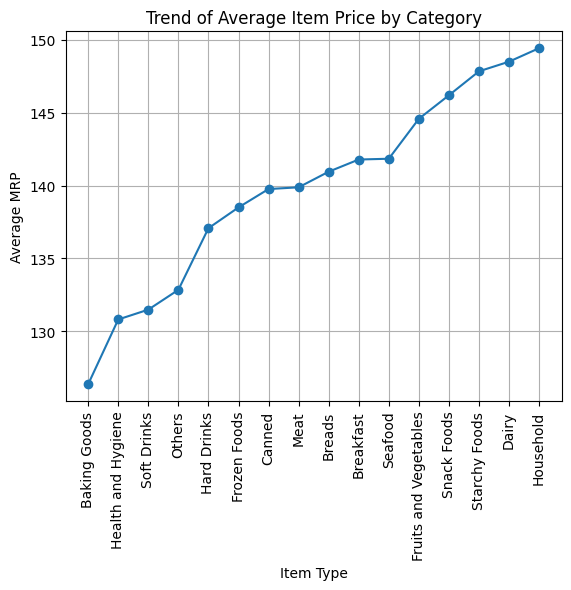

In [71]:
avg_price = data_f.groupby('Item_Type')['Item_MRP'].mean().sort_values()

#plt.figure(figsize=(10,5))
plt.plot(avg_price.index, avg_price.values, marker='o')
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Average MRP")
plt.title("Trend of Average Item Price by Category")
plt.grid(True)
plt.show()


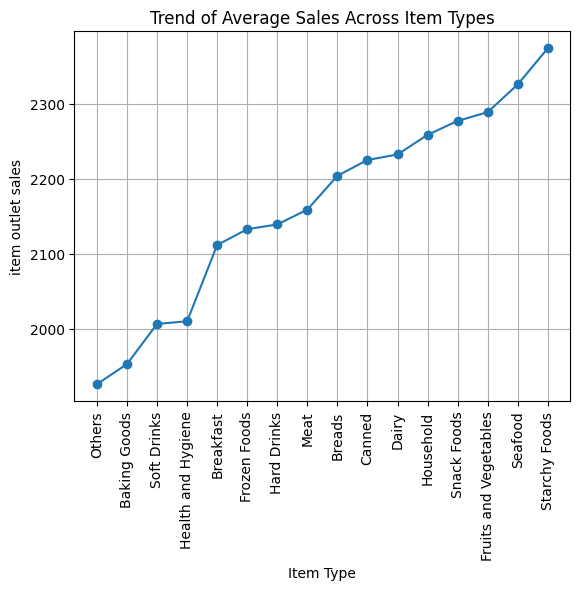

In [72]:
avg_sale = data_f.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

#plt.figure(figsize=(10,5))
plt.plot(avg_sale.index, avg_sale.values, marker='o')
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.title("Trend of Average Sales Across Item Types")
plt.ylabel("item outlet sales")
plt.grid(True)
plt.show()


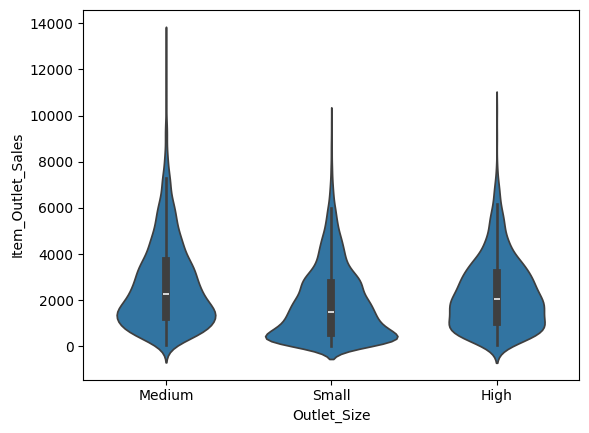

In [73]:
import seaborn as sns
sns.violinplot(x=data_f['Outlet_Size'], y=data_f['Item_Outlet_Sales'])
plt.show()


# parquet
saving file

In [74]:
import pyarrow
data_f.to_parquet("cleaned_bigmart_data.parquet", index=False)
